# **EX01. 計算捲積**

In [ ]:
import numpy as np

# Test
source = np.array(list('111111111110111100111000110000100000')).astype(np.int)
source = source.reshape(6,6)
print('原始資料：')
print(source)

# Filter
filter = np.array(list('1111111011001000')).astype(np.int).reshape(4,4)
print('\n濾波器:')
print(filter)

原始資料：
[[1 1 1 1 1 1]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]]

濾波器:
[[1 1 1 1]
 [1 1 1 0]
 [1 1 0 0]
 [1 0 0 0]]


In [ ]:
# 初始化計算結果的矩陣
width = height = source.shape[0] - filter.shape[0] + 1
result = np.zeros((width, height))

# 計算每一格
for i in range(width):
    for j in range(height):
        value01 =source[i:i+filter.shape[0], j:j+filter.shape[1]] * filter
        result[i, j] = np.sum(value01)
print(result)

[[10. 10. 10.]
 [10. 10.  6.]
 [10.  6.  3.]]


## 卷積影像轉換函數

In [ ]:
# 卷積影像轉換函數
from skimage.exposure import rescale_intensity

def convolve(image01, kernel01):
    # 取得圖像與濾波器的寬高
    (imgH, imgW) = image01.shape[:2]
    (kerH, kerW) = kernel01.shape[:2]

    # 計算單邊所需的補零行數
    pad01 = int((kW - 1) / 2)
    image01 = cv2.copyMakeBorder(image01, pad01, pad01, pad01, pad01, cv2.BORDER_REPLICATE)
    output01 = np.zeros((imgH, imgW), dtype="float32")

    # 卷積
    for y in np.arange(pad01, imgH + pad01):
        for x in np.arange(pad01, imgW + pad01):            
            roi = image01[y - pad01:y + pad01 + 1, x - pad01:x + pad01 + 1]            
            k = (roi * kernel01).sum()
            output01[y - pad01, x - pad01] = k

    # 調整影像色彩深淺範圍至 (0, 255)
    output01 = rescale_intensity(output01, in_range=(0, 255))
    output01 = (output01 * 255).astype("uint8")
   
    return output01

## 灰階化

In [ ]:
import skimage
import cv2

# 從 skimage 取得內建的圖像
image01 = skimage.data.chelsea()
cv2.imshow("original", image01)

# 灰階化
img_gray = cv2.cvtColor(image01, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray", img_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 模糊化

In [ ]:
# 小模糊 
smallBlur01 = np.ones((6, 6), dtype="float") * (1.0 / (6 * 6))

convoleOutput01 = convolve(img_gray, smallBlur01)
opencvOutput01 = cv2.filter2D(img_gray, -1, smallBlur01)
cv2.imshow("small Blur", convoleOutput01)

# 大模糊
largeBlur01 = np.ones((20, 20), dtype="float") * (1.0 / (20 * 20))

convoleOutput02 = convolve(img_gray, largeBlur01)
opencvOutput02 = cv2.filter2D(img_gray, -1, largeBlur01)
cv2.imshow("large Blur", convoleOutput02)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 銳利化

In [ ]:
sharpen01 = np.array((
    [0, -2, 0],
    [-2, 6, -2],
    [0, -2, 0]), dtype="int")

convoleOutput01 = convolve(gray, sharpen01)
opencvOutput01 = cv2.filter2D(gray, -1, sharpen01)
cv2.imshow("sharpen01", convoleOutput01)

cv2.waitKey(0)
cv2.destroyAllWindows()

# **EX02. MNIST 模型強化**

## Step01：載入 MNIST 手寫阿拉伯數字資料

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train_mnist, y_train_mnist),(x_test_mnist, y_test_mnist) = mnist.load_data()

# 顏色範圍：0~255，所以，公式簡化為 x / 255
x_train_norm, x_test_norm = x_train_mnist / 255.0, x_test_mnist / 255.0

11501568/11490434 [==============================] - 0s 0us/step


## Step02：CNN 模型

In [ ]:
# 建立模型
from tensorflow.keras import layers
import numpy as np

input_image_shape=(26, 26, 1)
# 新增一維在最後面
x_train_norm = np.expand_dims(x_train_norm, -1)
x_test_norm = np.expand_dims(x_test_norm, -1)

# CNN 模型
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_image_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型訓練
history01 = model.fit(x_train_norm, y_train_mnist, epochs=5, validation_split=0.2)

# 評分(Score Model)
score01 = model.evaluate(x_test_norm, y_test_mnist, verbose=0)

for i, x in enumerate(score01):
    print(f'{model.metrics_names[i]}: {score01[i]:.4f}')

Epoch 1/5
1500/1500 [==============================] - 40s 26ms/step - loss: 0.2260 - accuracy: 0.9312 - val_loss: 0.0737 - val_accuracy: 0.9779
Epoch 2/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0803 - accuracy: 0.9749 - val_loss: 0.0474 - val_accuracy: 0.9864
Epoch 3/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 4/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0518 - accuracy: 0.9834 - val_loss: 0.0364 - val_accuracy: 0.9899
Epoch 5/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0473 - accuracy: 0.9847 - val_loss: 0.0345 - val_accuracy: 0.9899
loss: 0.0262
accuracy: 0.9907


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# **EX03. cifar10 辨識**

## Step01：載入 cifar10 資料

In [ ]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

# 載入 cifar10 資料
(x_train_cifar10, y_train_cifar10),(x_test_cifar10, y_test_cifar10) = cifar10.load_data()

# 訓練/測試資料的 X/Y 維度
print(x_train_cifar10.shape, y_train_cifar10.shape,x_test_cifar10.shape, y_test_cifar10.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## Step02：特徵工程，將特徵縮放成 (0, 1) 之間

In [ ]:
# 特徵縮放，使用常態化(Normalization)
x_train_norm, x_test_norm = x_train_cifar10 / 255, x_test_cifar10 / 255

In [ ]:
# 確認轉換成功
x_train_norm[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_test_norm[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

## Step03：建立模型結構

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(10)    
])

## Step04：結合訓練資料及模型，進行模型訓練


In [ ]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train_cifar10, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.5553 - accuracy: 0.4278 - val_loss: 1.3072 - val_accuracy: 0.5347
Epoch 2/10
1250/1250 [==============================] - 48s 38ms/step - loss: 1.2032 - accuracy: 0.5712 - val_loss: 1.1287 - val_accuracy: 0.6012
Epoch 3/10
1250/1250 [==============================] - 48s 39ms/step - loss: 1.0456 - accuracy: 0.6313 - val_loss: 1.0204 - val_accuracy: 0.6425
Epoch 4/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.9408 - accuracy: 0.6710 - val_loss: 0.9589 - val_accuracy: 0.6653
Epoch 5/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.8549 - accuracy: 0.6977 - val_loss: 0.9202 - val_accuracy: 0.6836
Epoch 6/10
1250/1250 [==============================] - 50s 40ms/step - loss: 0.7896 - accuracy: 0.7220 - val_loss: 0.9123 - val_accuracy: 0.6874
Epoch 7/10
1250/1250 [==============================] - 50s 40ms/step - loss: 0.7341 - accuracy: 0.7425 - val_loss: 0.9074 -

## Step05：模型評分

In [ ]:
score01=model.evaluate(x_test_norm, y_test_cifar10, verbose=0)

for i, x in enumerate(score01):
    print(f'{model.metrics_names[i]}: {score01[i]:.4f}')

loss: 0.9292
accuracy: 0.6949


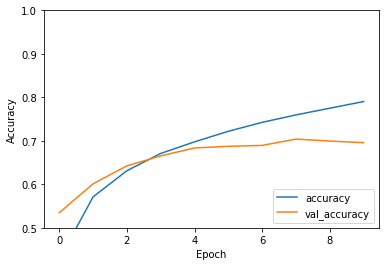

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

# **EX04. MNIST 模型強化_資料增補**

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train_mnist, y_train_mnist),(x_test_mnist, y_test_mnist) = mnist.load_data()

In [ ]:
# 建立模型
from tensorflow.keras import layers
import numpy as np

input_image_shape=(27, 27, 1)
# 新增一維在最後面
x_train_mnist = np.expand_dims(x_train_mnist, -1)
x_test_mnist = np.expand_dims(x_test_mnist, -1)

# CNN 模型
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_image_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 資料增補

In [ ]:
# 參數設定
batch_size = 1000
epochs = 5

# 資料增補定義
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255, # 特徵縮放
        rotation_range=15,  # 旋轉 15 度
        zoom_range=0.15, # 拉遠/拉近 20%
        width_shift_range=0.15,  # 寬度偏移  0.15%
        height_shift_range=0.15) # 高度偏移  0.15%

# 增補資料，進行模型訓練
datagen.fit(x_train_mnist)
history = model.fit(datagen.flow(x_train_mnist, y_train_mnist, batch_size=batch_size), epochs=epochs,
          validation_data=datagen.flow(x_test_mnist, y_test_mnist, batch_size=batch_size), verbose=2,
          steps_per_epoch=x_train_mnist.shape[0]//batch_size)

Epoch 1/5
60/60 - 54s - loss: 1.6663 - accuracy: 0.4354 - val_loss: 0.9017 - val_accuracy: 0.7290
Epoch 2/5
60/60 - 53s - loss: 0.8191 - accuracy: 0.7365 - val_loss: 0.5079 - val_accuracy: 0.8549
Epoch 3/5
60/60 - 53s - loss: 0.5790 - accuracy: 0.8200 - val_loss: 0.3780 - val_accuracy: 0.8900
Epoch 4/5
60/60 - 53s - loss: 0.4701 - accuracy: 0.8566 - val_loss: 0.2980 - val_accuracy: 0.9160
Epoch 5/5
60/60 - 52s - loss: 0.3985 - accuracy: 0.8777 - val_loss: 0.2589 - val_accuracy: 0.9261


In [ ]:
# 評分(Score Model)
score01=model.evaluate(x_test_mnist, y_test_mnist, verbose=0)

for i, x in enumerate(score01):
    print(f'{model.metrics_names[i]}: {score01[i]:.4f}')

loss: 10.6118
accuracy: 0.9716
